In [5]:
import numpy as np
import colorsys
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import BarChart_plt
import Data
%matplotlib inline
#load data
df = pd.read_csv('vgsales.csv')



In [13]:
df = Data.Data_form(df)

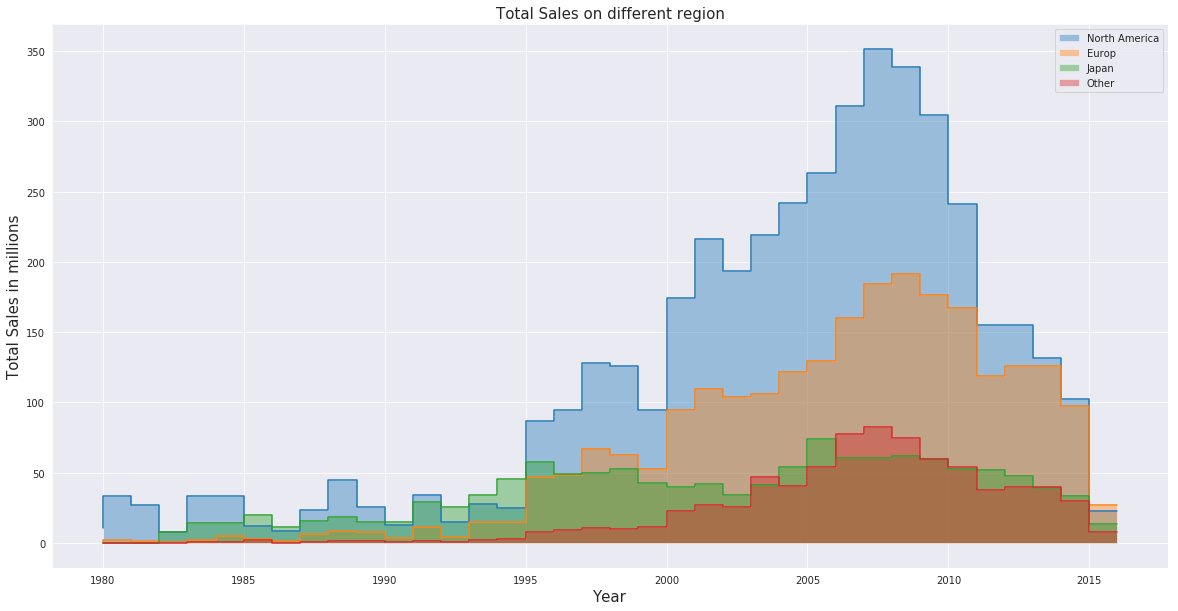

In [9]:
BarChart_plt.mul_barchart(df)

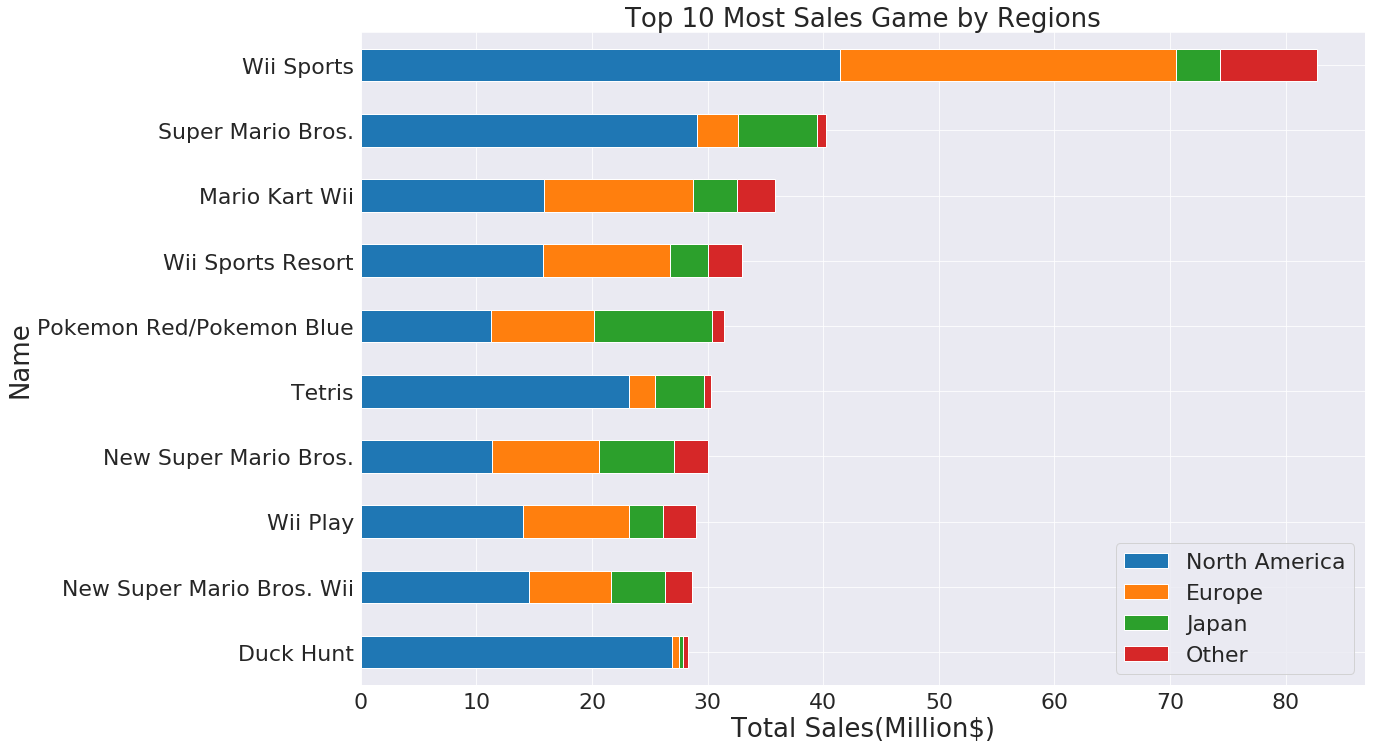

In [10]:
df1 = Data.Data_a(df)
BarChart_plt.bar_grid(df1,"Top 10 Most Sales Game by Regions")

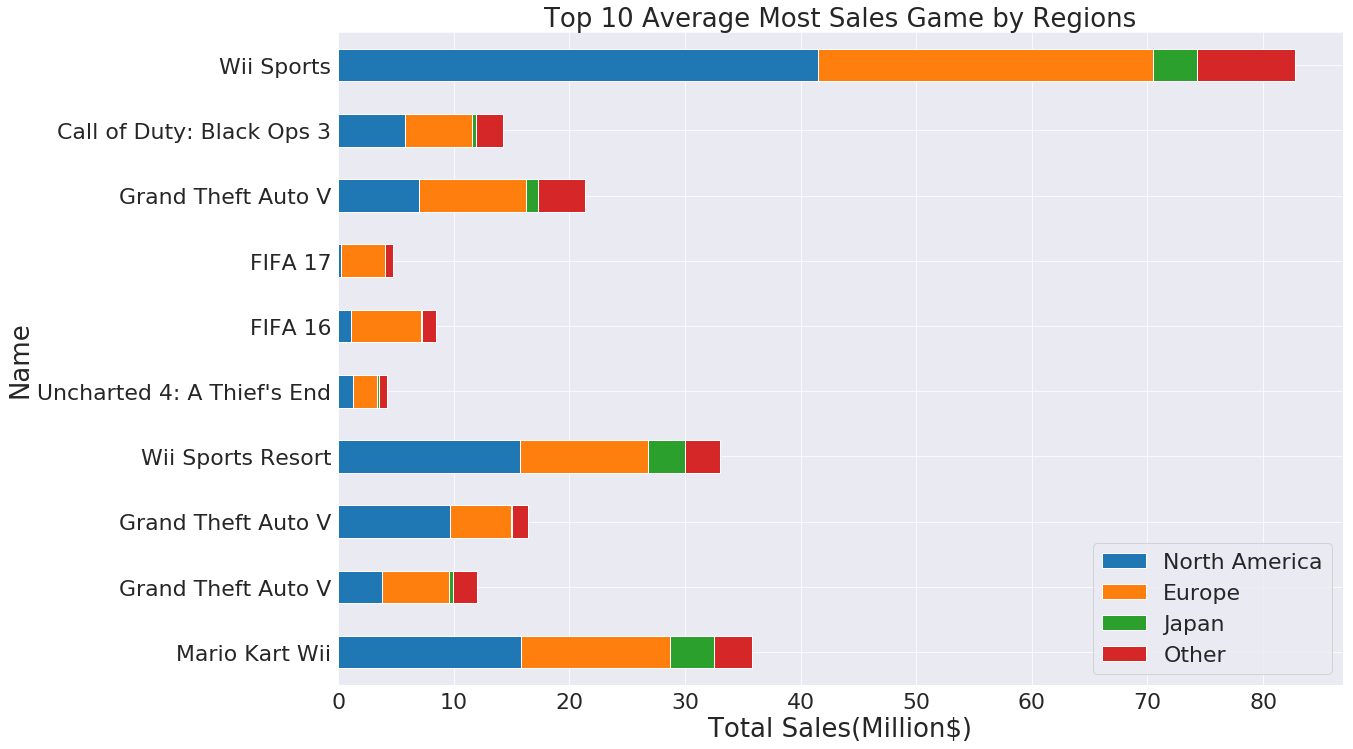

In [11]:
df2 = Data.Data_ave(df)
BarChart_plt.bar_grid(df2,"Top 10 Average Most Sales Game by Regions")

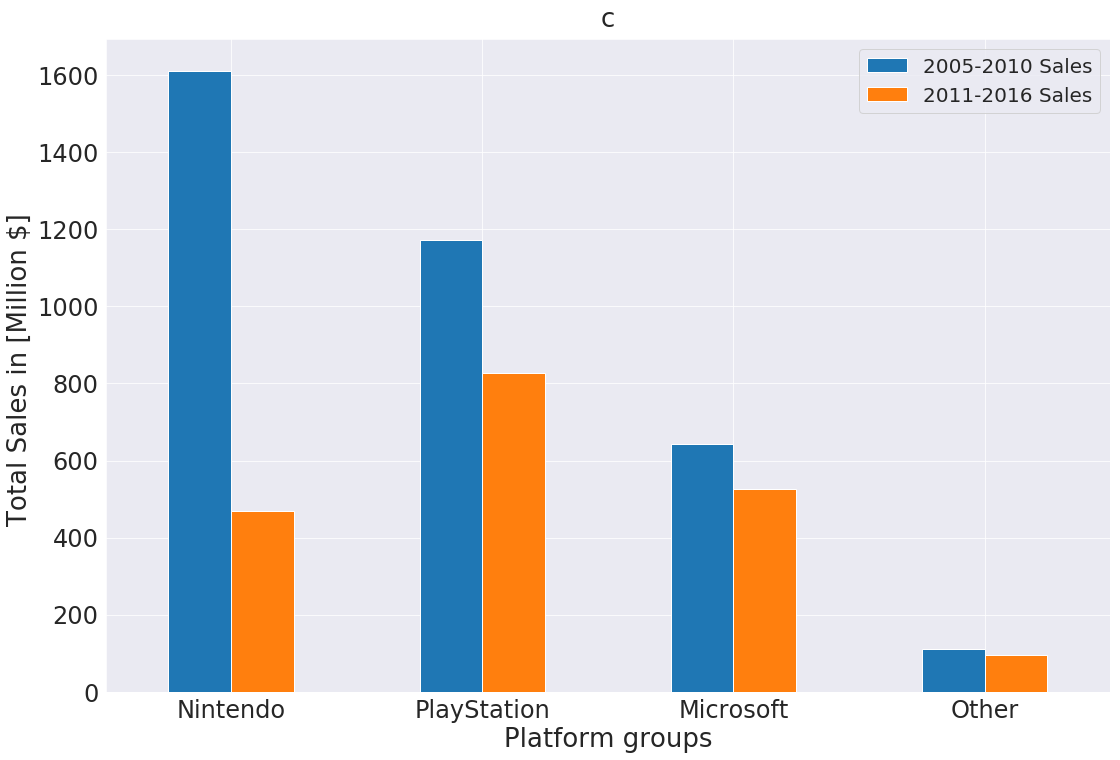

In [12]:
Data.plot_compare(df)